# Twitter Sentiment Analysis using Python

In this project, I have used three twitter accounts.
1. CNN (New Channel)
2. Netflix (Organization)
3. Barack Obama (celebrity)



## Caching results

In the place of consumer_key, comsumer_secret, access_token and access_secret, you have to place your own Twitter API consumer_key, comsumer_secret, access_token and access_secret.

In [4]:
from myTwitterKeys import consumer_key, consumer_secret, access_token, access_secret
import tweepy
import pickle

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


public_tweets_CNN = api.user_timeline('CNN Breaking News')
for tweet in public_tweets_CNN:
    print(tweet.text)
    
public_tweets_Obama = api.user_timeline('Barack Obama')
for tweet in public_tweets_Obama:
    print(tweet.text)

public_tweets_Netflix = api.user_timeline('Netflix US')
for tweet in public_tweets_Netflix:
    print(tweet.text)
    
with open('CNNBreakingNews.pkl', 'wb') as f:
    pickle.dump(public_tweets_CNN, f)

with open('BarackObama.pkl', 'wb') as f:
    pickle.dump(public_tweets_Obama, f)

with open('NetflixUS.pkl', 'wb') as f:
    pickle.dump(public_tweets_Netflix, f)

ModuleNotFoundError: No module named 'myTwitterKeys'

## Reading the Tweets from different accounts

In [2]:
import pickle
with open('CNN.pkl', 'rb') as f:
    CNN_tweets = pickle.load(f)

with open('BarackObama.pkl', 'rb') as f:
    BarackObama_tweets = pickle.load(f)
    
with open('netflix.pkl', 'rb') as f:
    netflix_tweets = pickle.load(f)

With these accounts, I have analyzed with three different combinations.
1. Sentiment Analysis
2. Device/client used
3. Date Analysis


## Sentiment Analysis

In [21]:
def sentimentAnalysisFunction(TweetsData):
    from textblob import TextBlob
    import sys, tweepy
    import matplotlib.pyplot as plt
    import pickle
    import numpy as np
    import datetime
    from collections import Counter
    
    def percentage(part, whole):
        return 100*float(part)/float(whole);
    
    positive = 0
    negative = 0
    polarity = 0
    neutral = 0
    count = 0

    for  tweet in TweetsData:
        analysis = TextBlob(tweet.text)
        polarity += analysis.sentiment.polarity
        count = count + 1
        if(analysis.sentiment.polarity < 0.00):
            negative += 1
        elif(analysis.sentiment.polarity == 0):
            neutral += 1
        elif(analysis.sentiment.polarity > 0.00):
            positive += 1
        
        

    positivePercentage = percentage(positive, count)
    negativePercentage = percentage(negative, count)
    neutralPercentage = percentage(neutral, count)

    positive = format(positivePercentage,'.2f')
    negative = format(negativePercentage,'.2f')
    neutral = format(neutralPercentage,'.2f')
    

    labels = ['Positive ['+str(positive)+'%','Neutral:' +str(neutral)+'%','Negative:' +str(negative)+'%']
    sizes = [positive,neutral,negative]
    colors = ['yellowgreen','gold','red']
    patches,texts = plt.pie(sizes, colors = colors, startangle = 90)
    plt.legend (patches,labels,loc = 'best')
    plt.title('How people are reacting on Tweets by analyzing ' + str(count) +' Tweets')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

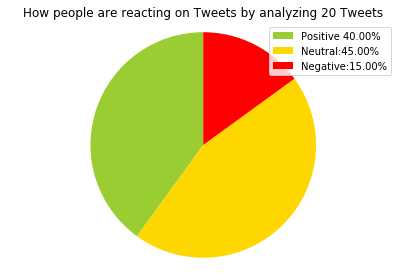

	CNN Tweets Sentiment Analysis


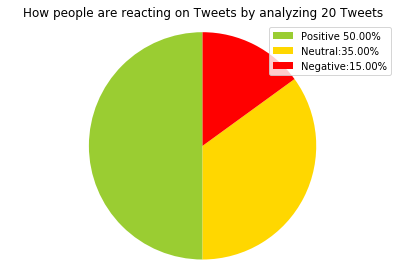

	Barack Obama Tweets Sentiment Analysis


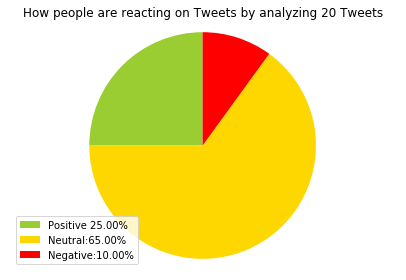

	Netflix Tweets Sentiment Analysis


In [3]:
import pickle
import sentimentAnalysisMethod

with open('CNN.pkl', 'rb') as f:
    CNN_tweets = pickle.load(f)

with open('BarackObama.pkl', 'rb') as f:
    BarackObama_tweets = pickle.load(f)
    
with open('netflix.pkl', 'rb') as f:
    netflix_tweets = pickle.load(f)
    

a = sentimentAnalysisMethod.sentimentAnalysisFunction(CNN_tweets)
print("\t""CNN Tweets Sentiment Analysis")

b = sentimentAnalysisMethod.sentimentAnalysisFunction(BarackObama_tweets)
print("\tBarack Obama Tweets Sentiment Analysis")
c = sentimentAnalysisMethod.sentimentAnalysisFunction(netflix_tweets)
print("\tNetflix Tweets Sentiment Analysis")